In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

In [2]:
def extract_numerical_substrings(input_string):
    # Use regular expression to find all substrings with numerical characters
    numerical_substrings = re.findall(r'\d+', input_string)
    return numerical_substrings

In [3]:
dataset_dir = 'PennTreeBank/'
results_dir = 'trained_models_'

In [4]:
# collect from all the text files in the directory PennTreeBank the Test ppl values
# and store them in a pandas dataframe
qbits = "6qbits"
path = dataset_dir + results_dir + qbits
if not os.path.exists(path):
    raise FileNotFoundError(f"The directory {path} does not exist.")
files = [f for f in os.listdir(path) if f.endswith('.txt')]

# Initialize an empty DataFrame
df = pd.DataFrame(columns=['Model', 'Test ppl'])

# Collect data from files
data = []
for file in files:
    with open(os.path.join(path, file), 'r') as f:
        lines = f.readlines()
        print(f"Reading file: {file}")
        for line in lines:
            if 'Test ppl' in line:
                print(f"Found 'Test ppl' in line: {line.strip()}")
                try:
                    # get the string after the string "Test ppl:" and convert it to a float
                    test_ppl = extract_numerical_substrings(line)
                    print(f"Extracted numerical substrings: {test_ppl}")
                    test_ppl = float(test_ppl[8] + '.' + test_ppl[9])
                    data.append({'Model': file, 'Test ppl': test_ppl})
                except ValueError:
                    print(f"Could not convert value to float in file {file}: {line.split()[-1]}")
                except IndexError:
                    print(f"Line format is incorrect in file {file}: {line}")

# Create DataFrame from collected data
df = pd.DataFrame(data)
print("DataFrame created:", df)

# Clean the 'Model' column
df['Model'] = df['Model'].str.replace('.txt', '')
df['Model'] = df['Model'].str.replace('wiki_', '')
df['Model'] = df['Model'].str.replace('_6qbits', '')
df['Model'] = df['Model'].str.replace('_', ' ')
df['Model'] = df['Model'].str.replace('results', ' ')
# remove the remainder of the model name after the space
df['Model'] = df['Model'].str.split().str[0]
df = df.sort_values(by='Test ppl')
df = df.reset_index(drop=True)

print("Cleaned DataFrame:", df)

Reading file: results_VAS96_418535.txt
Found 'Test ppl' in line: Val. Loss: 4.676 |  Val. ppl: 107.34283260374605 | Val. Accuracy: 0.258	 Test Loss: 4.604 |  Test ppl: 99.84375300173967 | Test Accuracy: 0.261
Extracted numerical substrings: ['4', '676', '107', '34283260374605', '0', '258', '4', '604', '99', '84375300173967', '0', '261']
Reading file: results_QLINSVT_431657.txt
Found 'Test ppl' in line: Val. Loss: 4.858 |  Val. ppl: 128.80930805805951 | Val. Accuracy: 0.249	 Test Loss: 4.788 |  Test ppl: 120.04460900455558 | Test Accuracy: 0.252
Extracted numerical substrings: ['4', '858', '128', '80930805805951', '0', '249', '4', '788', '120', '04460900455558', '0', '252']
Reading file: results_LSTM128_999091.txt
Found 'Test ppl' in line: Val. Loss: 5.236 |  Val. ppl: 187.82606136717047 | Val. Accuracy: 0.220	 Test Loss: 5.177 |  Test ppl: 177.10175645733602 | Test Accuracy: 0.223
Extracted numerical substrings: ['5', '236', '187', '82606136717047', '0', '220', '5', '177', '177', '1017

In [5]:
# create a new DataFrame with the Test ppl values as rows and the model values as columns. The values of the DataFrame are the Test ppl values
df_pivot = df.pivot(columns='Model', values='Test ppl')
# rename column names
# insert a space between the model name and the number of qbits
df_pivot.columns = df_pivot.columns.str.replace('QLINSVT', 'Quixer' + ' (' + qbits +')')
df_pivot.columns = df_pivot.columns.str.replace('6qbits', '6 qbits, d=3')
# sort each column separetaly in ascending order taking into account the NaN values
df_pivot = df_pivot.apply(lambda x: x.sort_values().values)
# remove all the rowd with all NaN values
df_pivot = df_pivot.dropna(how='all')
df_pivot = df_pivot.reset_index(drop=True)
print("Pivoted DataFrame:", df_pivot)

Pivoted DataFrame: Model     FNet128      FNet96     LSTM128      LSTM96  Quixer (6 qbits, d=3)  \
0      117.201617  119.040450  177.101756  190.773125             118.944444   
1      117.923038  119.463680  179.615180  196.829187             119.301432   
2      118.058831  120.067208  183.398315  199.215375             119.565327   
3      118.070069  120.277806  184.415647  199.713123             119.907262   
4      118.148427  120.333041  184.638818  200.814134             120.044609   
5      118.570448  120.347257  184.960532  201.184833             120.476381   
6      118.727866  120.487363  185.276376  202.045492             120.990931   
7      119.045301  120.548275  189.240427  207.962235             123.087526   
8      119.347742  120.673243  191.183436  211.623463             123.287070   
9      119.694254  120.878107  192.434673  216.529351             124.869230   

Model     VAS128       VAS96  
0      96.463902   99.692397  
1      96.705450   99.816340  
2      

In [6]:
# read the postselection_probs.txt file and store the values in a pandas DataFrame
postselection_prob_6qbits_3d = pd.read_csv(path + '/final_probs.txt', header=None, names=['Postselection Probability'])

postselection_prob_6qbits_3d = postselection_prob_6qbits_3d ** 2
postselection_prob_6qbits_3d.describe()

,Postselection Probability
count,308240.000000
mean,0.073494
std,0.033976
min,0.015444
25%,0.049791
50%,0.070679
75%,0.096259
max,0.515985


In [7]:
# collect from all the text files in the directory PennTreeBank the Test ppl values
# and store them in a pandas dataframe
qbits = "6qbits_4d"
path = dataset_dir + results_dir + qbits
if not os.path.exists(path):
    raise FileNotFoundError(f"The directory {path} does not exist.")
files = [f for f in os.listdir(path) if f.endswith('.txt')]

# Initialize an empty DataFrame
df = pd.DataFrame(columns=['Model', 'Test ppl'])

# Collect data from files
data = []
for file in files:
    with open(os.path.join(path, file), 'r') as f:
        lines = f.readlines()
        print(f"Reading file: {file}")
        for line in lines:
            if 'Test ppl' in line:
                print(f"Found 'Test ppl' in line: {line.strip()}")
                try:
                    # get the string after the string "Test ppl:" and convert it to a float
                    test_ppl = extract_numerical_substrings(line)
                    print(f"Extracted numerical substrings: {test_ppl}")
                    test_ppl = float(test_ppl[8] + '.' + test_ppl[9])
                    data.append({'Model': file, 'Test ppl': test_ppl})
                except ValueError:
                    print(f"Could not convert value to float in file {file}: {line.split()[-1]}")
                except IndexError:
                    print(f"Line format is incorrect in file {file}: {line}")

# Create DataFrame from collected data
df = pd.DataFrame(data)
print("DataFrame created:", df)

# Clean the 'Model' column
df['Model'] = df['Model'].str.replace('.txt', '')
df['Model'] = df['Model'].str.replace('wiki_', '')
df['Model'] = df['Model'].str.replace('_6qbits', '')
df['Model'] = df['Model'].str.replace('_', ' ')
df['Model'] = df['Model'].str.replace('results', ' ')
# remove the remainder of the model name after the space
df['Model'] = df['Model'].str.split().str[0]
df = df.sort_values(by='Test ppl')
df = df.reset_index(drop=True)

print("Cleaned DataFrame:", df)

Reading file: results_QLINSVT_750200.txt
Found 'Test ppl' in line: Val. Loss: 4.848 |  Val. ppl: 127.42211209174786 | Val. Accuracy: 0.249	 Test Loss: 4.781 |  Test ppl: 119.22756266315034 | Test Accuracy: 0.254
Extracted numerical substrings: ['4', '848', '127', '42211209174786', '0', '249', '4', '781', '119', '22756266315034', '0', '254']
Reading file: results_QLINSVT_563363.txt
Found 'Test ppl' in line: Val. Loss: 4.856 |  Val. ppl: 128.48380326418203 | Val. Accuracy: 0.250	 Test Loss: 4.783 |  Test ppl: 119.42904886017949 | Test Accuracy: 0.252
Extracted numerical substrings: ['4', '856', '128', '48380326418203', '0', '250', '4', '783', '119', '42904886017949', '0', '252']
Reading file: results_QLINSVT_655906.txt
Found 'Test ppl' in line: Val. Loss: 4.892 |  Val. ppl: 133.1564646345384 | Val. Accuracy: 0.245	 Test Loss: 4.819 |  Test ppl: 123.81283984715651 | Test Accuracy: 0.249
Extracted numerical substrings: ['4', '892', '133', '1564646345384', '0', '245', '4', '819', '123', '81

In [8]:
# create a new DataFrame with the Test ppl values as rows and the model values as columns. The values of the DataFrame are the Test ppl values
df_pivot_6qbits_d4 = df.pivot(columns='Model', values='Test ppl')
# rename column names
# insert a space between the model name and the number of qbits
df_pivot_6qbits_d4.columns = df_pivot_6qbits_d4.columns.str.replace('QLINSVT', 'Quixer' + ' (' + qbits +')')
df_pivot_6qbits_d4.columns = df_pivot_6qbits_d4.columns.str.replace('6qbits_4d', '6 qbits, d=4')
# sort each column separetaly in ascending order taking into account the NaN values
df_pivot_6qbits_d4 = df_pivot_6qbits_d4.apply(lambda x: x.sort_values().values)
# remove all the rowd with all NaN values
df_pivot_6qbits_d4 = df_pivot_6qbits_d4.dropna(how='all')
df_pivot_6qbits_d4 = df_pivot_6qbits_d4.reset_index(drop=True)
print("Pivoted DataFrame:", df_pivot_6qbits_d4)

Pivoted DataFrame: Model  Quixer (6 qbits, d=4)
0                 118.983013
1                 119.087138
2                 119.092017
3                 119.166624
4                 119.227563
5                 119.429049
6                 119.831550
7                 121.141142
8                 123.812840
9                 125.072671


In [9]:
# read the postselection_probs.txt file and store the values in a pandas DataFrame
postselection_prob_6qbits_4d = pd.read_csv(path + '/final_probs.txt', header=None, sep=' ', names=['Postselection Probability', 'stddev'])
# remove the 'stddev' column
postselection_prob_6qbits_4d = postselection_prob_6qbits_4d['Postselection Probability']
postselection_prob_6qbits_4d = postselection_prob_6qbits_4d ** 2
postselection_prob_6qbits_4d.describe()

count    308240.000000
mean          0.046821
std           0.025858
min           0.007684
25%           0.030013
50%           0.046106
75%           0.056670
max           0.387914
Name: Postselection Probability, dtype: float64

In [10]:
# append the new DataFrame to df_pivot
df_pivot = pd.concat([df_pivot, df_pivot_6qbits_d4], axis=1)
#df_pivot = df_pivot[['FNet', 'LSTM', 'VAS', 'Quixer (5 qbits)', 'Quixer (6 qbits)', 'Quixer (7 qbits)']]
df_pivot = df_pivot[['FNet96', 'FNet128', 'LSTM96', 'LSTM128', 'VAS96', 'VAS128', 'Quixer (6 qbits, d=3)', 'Quixer (6 qbits, d=4)']]
# remane the columns
df_pivot.columns = ['FNet (96)', 'FNet (128)', 'LSTM (96)', 'LSTM (128)', 'Tranformer (96)', 'Tranformer (128)', 'Quixer (6 qbits, d=3)', 'Quixer (6 qbits, d=4)']

print("Pivoted DataFrame:", df_pivot)

Pivoted DataFrame:     FNet (96)  FNet (128)   LSTM (96)  LSTM (128)  Tranformer (96)  \
0  119.040450  117.201617  190.773125  177.101756        99.692397   
1  119.463680  117.923038  196.829187  179.615180        99.816340   
2  120.067208  118.058831  199.215375  183.398315        99.843753   
3  120.277806  118.070069  199.713123  184.415647        99.849993   
4  120.333041  118.148427  200.814134  184.638818        99.906330   
5  120.347257  118.570448  201.184833  184.960532        99.944959   
6  120.487363  118.727866  202.045492  185.276376       100.038089   
7  120.548275  119.045301  207.962235  189.240427       100.080863   
8  120.673243  119.347742  211.623463  191.183436       100.255840   
9  120.878107  119.694254  216.529351  192.434673       100.558841   

   Tranformer (128)  Quixer (6 qbits, d=3)  Quixer (6 qbits, d=4)  
0         96.463902             118.944444             118.983013  
1         96.705450             119.301432             119.087138  
2     

In [11]:
df_pivot = df_pivot[['Quixer (6 qbits, d=3)', 'Quixer (6 qbits, d=4)']]
stats = df_pivot.describe()
stats

,"Quixer (6 qbits, d=3)","Quixer (6 qbits, d=4)"
count,10.000000,10.000000
mean,121.047421,120.484361
std,2.002408,2.200087
min,118.944444,118.983013
25%,119.650811,119.110668
50%,120.260495,119.328306
75%,122.563377,120.813744
max,124.869230,125.072671


In [12]:
# create a latex table with the stats
latex_table = stats.to_latex(float_format="%.2f")
print(latex_table)

\begin{tabular}{lrr}
\toprule
 & Quixer (6 qbits, d=3) & Quixer (6 qbits, d=4) \\
\midrule
count & 10.00 & 10.00 \\
mean & 121.05 & 120.48 \\
std & 2.00 & 2.20 \\
min & 118.94 & 118.98 \\
25% & 119.65 & 119.11 \\
50% & 120.26 & 119.33 \\
75% & 122.56 & 120.81 \\
max & 124.87 & 125.07 \\
\bottomrule
\end{tabular}



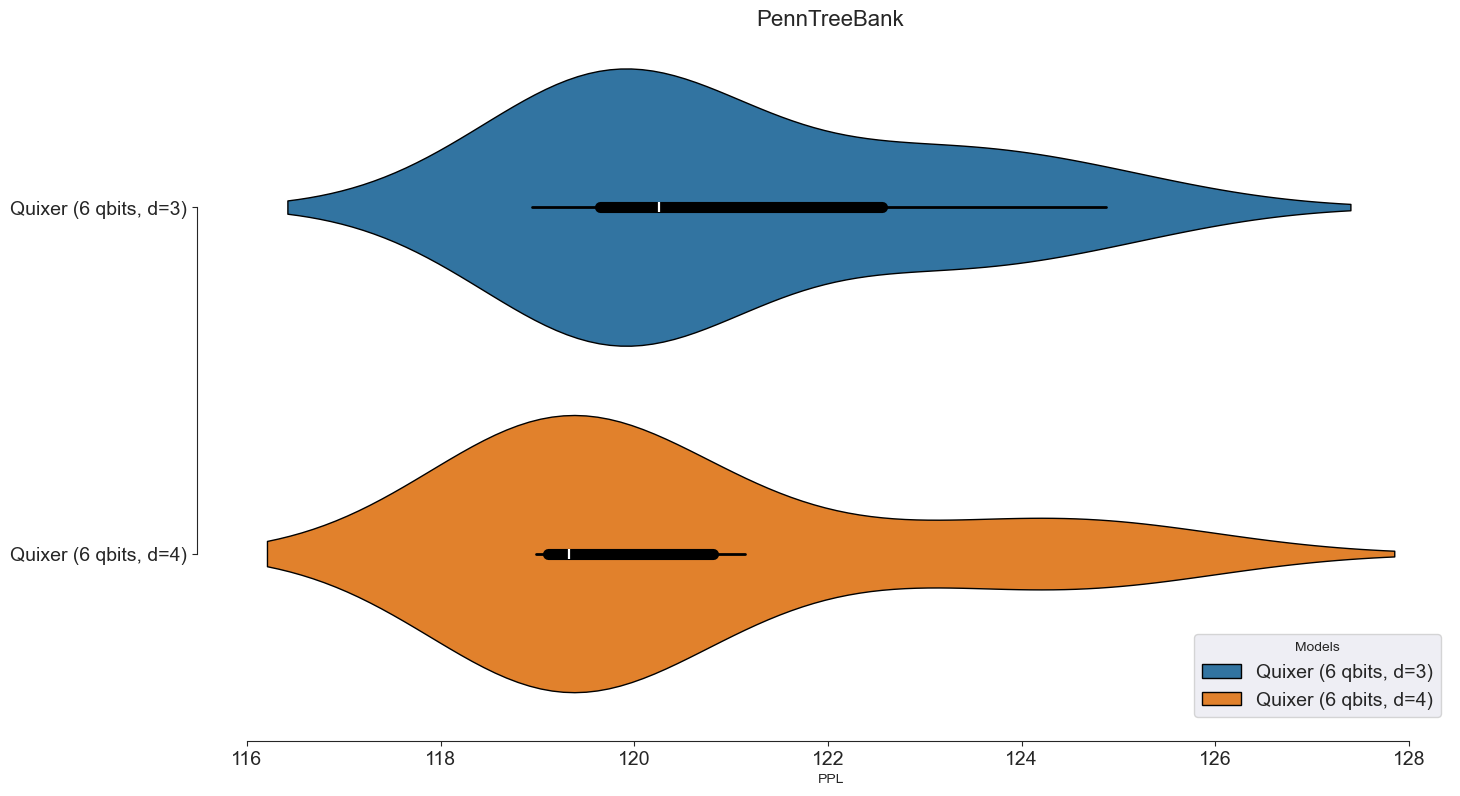

In [13]:
# plot a boxplot of the each column of the DataFrame
# remove all columns except the ones with Quixer models
plt.figure(figsize=(16, 9))
with sns.axes_style("ticks"):
    sns.violinplot(data=df_pivot, orient='h', linewidth=1, legend=True, linecolor="k", inner_kws=dict(box_width=8, whis_width=2))
    sns.despine(offset=10, trim=True)
plt.grid(False)
plt.title(dataset_dir[:-1], fontsize=16)
#plt.ylabel('Models')
plt.xlabel('PPL')
# set labels font size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='Models', loc='lower right', fontsize=14)
plt.savefig(dataset_dir + dataset_dir[:-1] + '_boxplot_d.png', dpi=300, bbox_inches='tight')
plt.show()

In [14]:
# Combine postselection probabilities in a single DataFrame with the model names as columns
postselection_prob = pd.concat([postselection_prob_6qbits_3d, postselection_prob_6qbits_4d], axis=1)
postselection_prob.columns = ['Quixer (6 qubits, d=3)', 'Quixer (6 qubits, d=4)']
# exclude all rows with values grater than 0.5
post_stats = postselection_prob.describe()

In [15]:
postselection_prob = postselection_prob[postselection_prob <= 0.5]

In [16]:
# create a latex table with the stats
latex_table = post_stats.to_latex(float_format="%.4f")
print(latex_table)

\begin{tabular}{lrr}
\toprule
 & Quixer (6 qubits, d=3) & Quixer (6 qubits, d=4) \\
\midrule
count & 308240.0000 & 308240.0000 \\
mean & 0.0735 & 0.0468 \\
std & 0.0340 & 0.0259 \\
min & 0.0154 & 0.0077 \\
25% & 0.0498 & 0.0300 \\
50% & 0.0707 & 0.0461 \\
75% & 0.0963 & 0.0567 \\
max & 0.5160 & 0.3879 \\
\bottomrule
\end{tabular}



/var/folders/m0/92gfbc6x10s7fdvbqfp73yqh0000gn/T/ipykernel_12140/2864477172.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right')


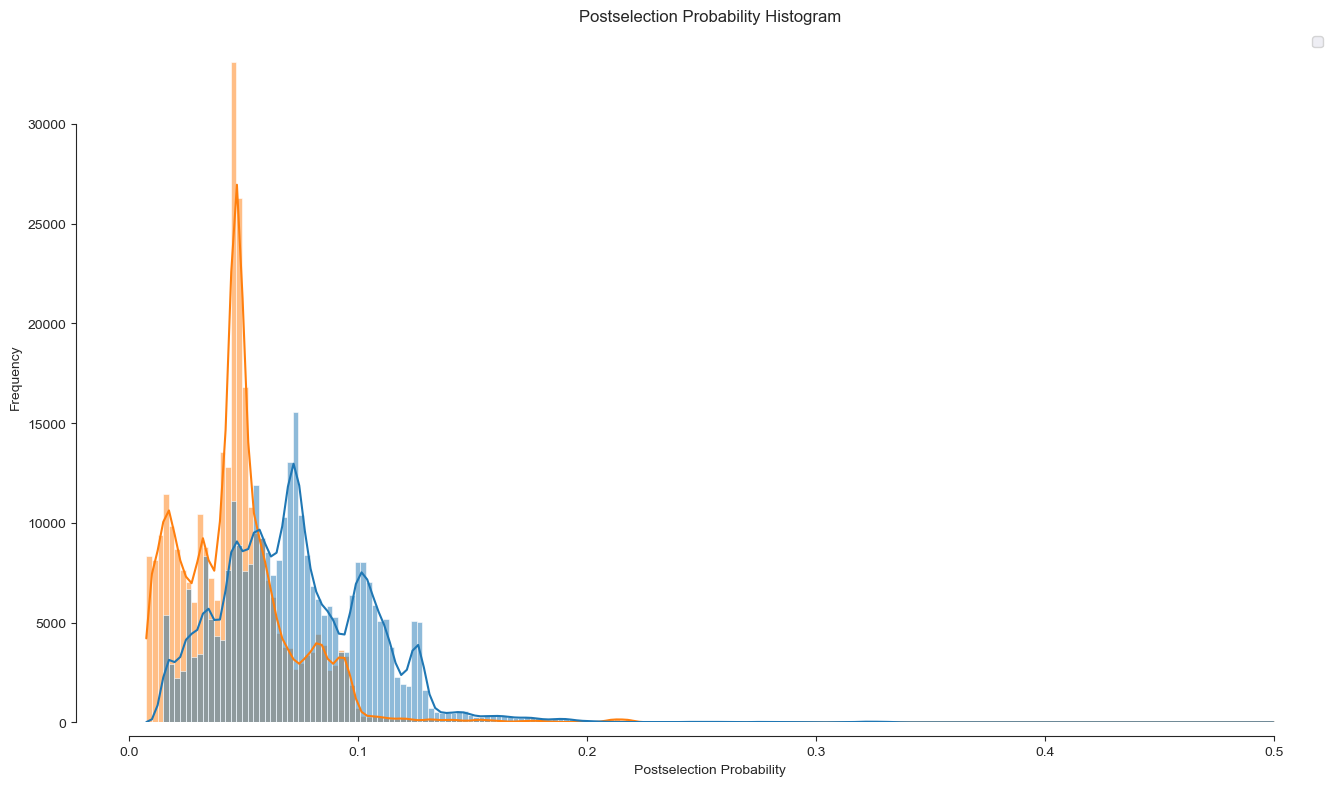

In [17]:
# plot the histogram of the postselection probabilities
plt.figure(figsize=(16, 9))
with sns.axes_style("ticks"):
    sns.histplot(postselection_prob, bins=200, kde=True, color='green', legend=False)
    sns.despine(offset=10, trim=True)
plt.grid(False)
plt.title('Postselection Probability Histogram')
plt.ylabel('Frequency')
plt.xlabel('Postselection Probability')
plt.legend(loc='upper right')
#plt.xlim(0, 0.03)
plt.savefig('PennTreeBank/trained_models_6qbits/postselection_prob_histogram_6qbits_d.png', dpi=300)

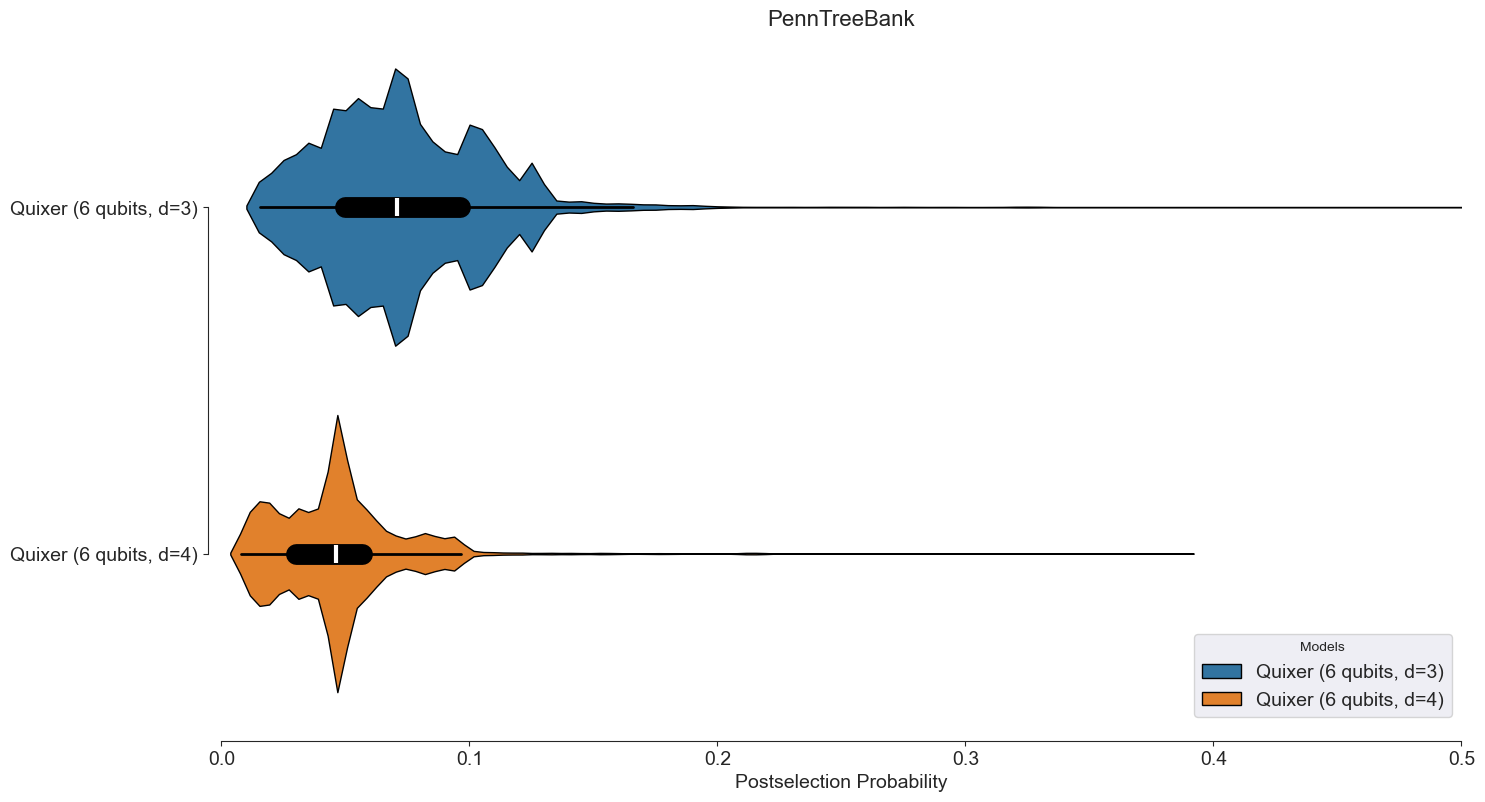

In [18]:
# plot the Half violin plot of the postselection probabilities
plt.figure(figsize=(16, 9))
with sns.axes_style("ticks"):
    sns.violinplot(data=postselection_prob, orient='h', linewidth=1, legend=True, linecolor="k", inner_kws=dict(box_width=15, whis_width=2))
    sns.despine(offset=10, trim=True)
plt.grid(False)
plt.title(dataset_dir[:-1], fontsize=16)
#plt.ylabel('Model')
plt.xlabel('Postselection Probability', fontsize=14)
plt.legend(title='Models', loc='lower right', fontsize=14)
# set labels font size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# limit the x-axis to the range [0, 0.05]
plt.xlim(0, 0.5)
plt.savefig(dataset_dir + dataset_dir[:-1] + '_postselection_prob_d.png', dpi=300, bbox_inches='tight')